# ADS Homework #2
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 8, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - PM2.5 Concentration in Beijing (50 points)

**What is a PM2.5?**<br>
“Particulate matter” (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. The '2.5' specifies particles with aerodynamic diameters less than or equal to 2.5 microns (μm). This is very small - to put in in perspective, it would take about 30 of these, lined up next to each other, to cover the width of a human hair. They result from a variety of activities, including power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions (hopefully not something to worry about in NYC) and dust storms.<br>
**Why is this important to cities?**<br>
An extensive body of scientific evidence shows that short- or long-term exposures to fine particles
can cause adverse cardiovascular effects, including heart attacks and strokes resulting in
hospitalizations and, in some cases, premature death. A number of studies have also linked fine
particle exposures to respiratory effects, including the exacerbation of asthma and other respiratory
illnesses (short-term exposures) and the impairment of lung development (long-term exposures). In short, PM2.5 poses public health risks, and is something which cities should be knowledgeable about; predicting when PM2.5 concentration will be particularly high could allow the city to issue warnings or place restrictions on certain activities (e.g. driving, industrial activity, etc.).<br>
**The Data**<br>
We will be looking specifically at Beijing from 2010-2014, using a variety of weather-related variables. Although there exists a time component, and other data sources could be merged to look for additional factors (this could be a great final project - think traffic data, air-taffic data, industrial activity, etc), we will specifically focused on weather for the purposes of this assignment. Please load and take a look at the data below. 

In [144]:
# load libraries; read in data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
%matplotlib inline

beijing_pm = pd.read_csv('Beijing_PM2.5.csv')
beijing_pm.head(3)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


#### Description of Data

The data can be found, along with descriptions, at the following source: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Attribute Information:**<br>
**No:** row number <br>
**year:** year of data in this row <br>
**month:** month of data in this row <br>
**day:** day of data in this row <br>
**hour:** hour of data in this row <br>
**pm2.5:** PM2.5 concentration (ug/m^3) <br>
**DEWP:** Dew Point (â„ƒ) <br>
**TEMP:** Temperature (â„ƒ) <br>
**PRES:** Pressure (hPa) <br>
**cbwd:** Combined wind direction <br>
**Iws:** Cumulated wind speed (m/s) <br>
**Is:** Cumulated hours of snow <br>
**Ir:** Cumulated hours of rain <br>

**1.1)** Data cleaning: As you can see, there are some *n/a* values in our dataframe that need to be removed. Do so, and while you're at it, remove any columns specifying date or time and the wind direction column, as we will not be using these in our analysis. Additionally, decimals should not be used in column names, as this can create problems further down the road - rename 'PM2.5' to simply 'PM25'. (The data are also messy in that the 'I' (i) in the last three columns is indistiguishable from a lower-case 'l' (L) in python's font. Please feel free to rename these to your choosing, however this is not required.) Show the first 5 rows of the cleaned dataset below, then print a descriptive table of the dataset (mean, stdev, etc). **(5 points)**

In [145]:
beijing_pm_new = beijing_pm[['No','pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']]
beijing_pm_new.head(5)
beijing_pm_new.info()
beijing_pm_new.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 8 columns):
No       43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(4)
memory usage: 2.7 MB


No       43824
pm2.5    41757
DEWP     43824
TEMP     43824
PRES     43824
Iws      43824
Is       43824
Ir       43824
dtype: int64

In [146]:
beijing_pm_new_1 = beijing_pm_new.dropna()
beijing_pm_new_1.count()
beijing_pm_new_1.head()
beijing_pm_new_1.columns = ['No','pm25','DEWP','TEMP','PRES','cws','cs','cr']
beijing_pm_new_1.head(20)

,No,pm25,DEWP,TEMP,PRES,cws,cs,cr
24,25,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,138.0,-7,-5.0,1022.0,6.25,2,0
29,30,109.0,-7,-6.0,1022.0,7.14,3,0
30,31,105.0,-7,-6.0,1023.0,8.93,4,0
31,32,124.0,-7,-5.0,1024.0,10.72,0,0
32,33,120.0,-8,-6.0,1024.0,12.51,0,0
33,34,132.0,-7,-5.0,1025.0,14.30,0,0


In [147]:
beijing_pm_new_1.corr()

,No,pm25,DEWP,TEMP,PRES,cws,cs,cr
No,1.000000,-0.017706,0.053953,0.088675,-0.025997,-0.064034,-0.032231,-0.018065
pm25,-0.017706,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.053953,0.171423,1.000000,0.823821,-0.777722,-0.293106,-0.034925,0.125341
TEMP,0.088675,-0.090534,0.823821,1.000000,-0.826903,-0.149613,-0.094785,0.049544
PRES,-0.025997,-0.047282,-0.777722,-0.826903,1.000000,0.178871,0.070537,-0.080532
cws,-0.064034,-0.247784,-0.293106,-0.149613,0.178871,1.000000,0.022630,-0.009157
cs,-0.032231,0.019266,-0.034925,-0.094785,0.070537,0.022630,1.000000,-0.009764
cr,-0.018065,-0.051369,0.125341,0.049544,-0.080532,-0.009157,-0.009764,1.000000


**1.2)** Take an initial look at the correlations among the variables to get a better intuition for the data. Plot the correlations in a heatmap table using the Seaborn library with the 'seismic' colormap (this provides for clearer visualization, and lets important values "jump out" at you more immediately - it is also comes across as less-scary when showing to non-data scientists). Try to adjust the figure-size so that it is not too compressed. Please include a brief summary of your observations.  **(5 points)**

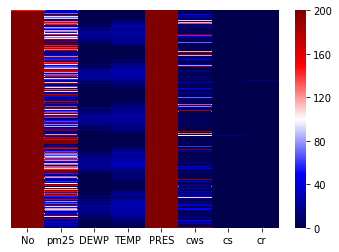

In [148]:
sns.heatmap(beijing_pm_new_1,vmin=0, vmax=200,cmap='seismic',yticklabels=False)

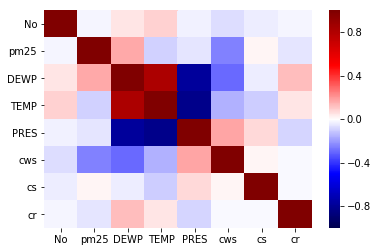

In [149]:
beijing_corr = beijing_pm_new_1.corr()
sns.heatmap(beijing_corr,vmin=-1, vmax=1,cmap='seismic')

**Summary:** According to the heatmap, it appears that the Cumulated wind speed has the strongest correlation to PM2.5

**1.3)** Using the independant variable with the strongest correlation (note: 'strong' is defined by absolute value) to PM2.5 concentration, run a single variable regression. Print the results, and write a brief interpretation of the R-squared. **(10 points)**

In [150]:
x_1 = beijing_pm_new_1['cws']
y = beijing_pm_new_1['pm25']
x_2 = beijing_pm_new_1['DEWP']
x_3 = beijing_pm_new_1['DEWP']
x_4 = beijing_pm_new_1['TEMP']
x_5 = beijing_pm_new_1['PRES']
x_6 = beijing_pm_new_1['cs']
x_7 = beijing_pm_new_1['cr']
x = beijing_pm_new_1[['cws','DEWP','TEMP','PRES','cs','cr']]
model = sma.OLS(beijing_pm_new_1['pm25'], beijing_pm_new_1['cws']).fit()
prediction = model.predict(beijing_pm_new_1['cws'], )
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          3.92e-251
Time:                        05:07:32   Log-Likelihood:            -2.6348e+05
No. Observations:               41757   AIC:                         5.270e+05
Df Residuals:                   41756   BIC:                         5.270e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cws            0.4031      0.012     34.081      0.000       0.380       0.426
==============================================================================
Omnibus:                    11599.616   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37947.530
Skew:                           1.409   Prob(JB):                         0.00
Kurtosis:                       6.725   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary:**The R-squared is 0.027, which is pretty small. It indicates that the correlation between PM2.5 and Cumulated wind speed is not very strong.

**1.4)** Now fit the regression with all of the independant variables. How does the R_squared change? What does this mean? How might colinearity impact our model? **(12 points)**

In [151]:
X = sma.add_constant(x)

result = sma.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2151.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:07:32   Log-Likelihood:            -2.4247e+05
No. Observations:               41757   AIC:                         4.849e+05
Df Residuals:                   41750   BIC:                         4.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1728.4313     72.990     23.680      0.000    1585.369    1871.493
cws           -0.2616      0.008    -31.015      0.000      -0.278      -0.245
DEWP           4.2822      0.053     80.109      0.000       4.177       4.387
TEMP          -6.0681      0.068    -88.764      0.000      -6.202      -5.934
PRES          -1.5291      0.071    -21.431      0.000      -1.669      -1.389
cs            -2.2669      0.510     -4.448      0.000      -3.266      -1.268
cr            -7.2063      0.282    -25.593      0.000      -7.758      -6.654
==============================================================================
Omnibus:                    14925.190   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72241.887
Skew:                           1.678   Prob(JB):                         0.00
Kurtosis:                       8.501   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Summary:**The R-squared value increased from 0.027 to 0.236. It means with all the independant variables together, there is a relatively strong correlation between the PM2.5 and all other variables. It might because of independant variables also have correlations with each other, and they can all influence PM2.5 together.

**1.5)** Run another regression on the data, this time removing the "DEWP" and "PRES" independant variables. What happens to the coefficients for the remaining variables? Why might this be the case? (Hint: look at your correlation table above) **(12 points)**

In [152]:
x_new = beijing_pm_new_1[['cws','TEMP','cs','cr']]
X_new = sma.add_constant(x_new)
result_new = sma.OLS(y,X_new).fit()
result_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     913.4
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:07:32   Log-Likelihood:            -2.4634e+05
No. Observations:               41757   AIC:                         4.927e+05
Df Residuals:                   41752   BIC:                         4.927e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.8806      0.681    180.543      0.000     121.547     124.215
cws           -0.4963      0.009    -56.358      0.000      -0.514      -0.479
TEMP          -0.9601      0.036    -26.610      0.000      -1.031      -0.889
cs             1.5151      0.557      2.719      0.007       0.423       2.607
cr            -3.0767      0.305    -10.088      0.000      -3.675      -2.479
==============================================================================
Omnibus:                    14334.505   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55969.005
Skew:                           1.688   Prob(JB):                         0.00
Kurtosis:                       7.557   Cond. No.                         88.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Summary:**When I took Dew Point and Pressure out of the data, other coefficients increases. 

**1.6)** Calculate (either in python or by hand) the impact of a one standard deviation increase in *temperature* and a one standard deviation increase in *cumulative wind speed* for the models in **1.4** & **1.5**. **(6 points)**

In [153]:
x['cws'] = (x['cws'] - x['cws'].mean()) / x['cws'].std()
x['TEMP'] = (x['TEMP'] - x['TEMP'].mean()) / x['TEMP'].std()
X = sma.add_constant(x)

result = sma.OLS(y,X).fit()
result.summary()


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     2151.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:07:33   Log-Likelihood:            -2.4247e+05
No. Observations:               41757   AIC:                         4.849e+05
Df Residuals:                   41750   BIC:                         4.850e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1646.9329     72.553     22.700      0.000    1504.728    1789.138
cws          -12.9820      0.419    -31.015      0.000     -13.802     -12.162
DEWP           4.2822      0.053     80.109      0.000       4.177       4.387
TEMP         -73.8804      0.832    -88.764      0.000     -75.512     -72.249
PRES          -1.5291      0.071    -21.431      0.000      -1.669      -1.389
cs            -2.2669      0.510     -4.448      0.000      -3.266      -1.268
cr            -7.2063      0.282    -25.593      0.000      -7.758      -6.654
==============================================================================
Omnibus:                    14925.190   Durbin-Watson:                   0.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72241.887
Skew:                           1.678   Prob(JB):                         0.00
Kurtosis:                       8.501   Cond. No.                     1.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [154]:
x_new['cws'] = (x_new['cws'] - x_new['cws'].mean()) / x_new['cws'].std()
x_new['cws'] = (x_new['cws'] - x_new['cws'].mean()) / x_new['cws'].std()
X_new = sma.add_constant(x_new)
result_new = sma.OLS(y,X_new).fit()
result_new.summary()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm25   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     913.4
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        05:07:33   Log-Likelihood:            -2.4634e+05
No. Observations:               41757   AIC:                         4.927e+05
Df Residuals:                   41752   BIC:                         4.927e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        111.0360      0.626    177.501      0.000     109.810     112.262
cws          -24.6242      0.437    -56.358      0.000     -25.481     -23.768
TEMP          -0.9601      0.036    -26.610      0.000      -1.031      -0.889
cs             1.5151      0.557      2.719      0.007       0.423       2.607
cr            -3.0767      0.305    -10.088      0.000      -3.675      -2.479
==============================================================================
Omnibus:                    14334.505   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55969.005
Skew:                           1.688   Prob(JB):                         0.00
Kurtosis:                       7.557   Cond. No.                         25.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answers:For model in 1.4: A one standard deviation increase in cumulated wind speed decreases pm2.5 by 12.982. A one standard deviation increase in temprature decreases pm2.5 by 73.8804.

For model in 1.5: A one standard deviation increase in cumulated wind speed decreases pm2.5 by 24.6242. A one standard deviation increase in temprature decreases pm2.5 by 0.9601.

### Problem 2 - Polynomial Regression (30 points)

In [155]:
# let's create some artificial data
y  = [2.61338821976, 2.17035124741, 0.0495462311938, 1.15825768821, 1.39756687454, 1.77323953196]
x1 = [-0.5, -0.32, -0.14, 0.04, 0.22, 0.4]
df = pd.DataFrame(data=[y, x1], index=(['y', 'x1'])).T
df.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**2.1)** Draw a scatter plot of the data (no lines required). Does there seem to be an apparent line of best fit? **(5 points)**

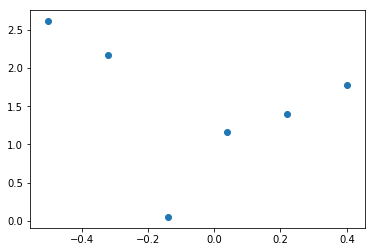

In [156]:
plt.scatter(x1, y)

**Summary:**It does not seem like there is an apparent line of best fit.

**2.2)** Our dependant variable *y*, in this case, does not appear to be a linear function of *x*. Create new columns in the dataframe for $x^2$, $x^3$, and $x^4$. **(5 points)**

In [157]:
def square(list):
    return [i ** 2 for i in list]
def triple(list):
    return [i ** 3 for i in list]

In [158]:
x2 = square(x1)
x3 = triple(x1)
x4 = square(x2)
df_1 = pd.DataFrame(data=[y, x1, x2, x3, x4], index=(['y', 'x1', 'x2', 'x3', 'x4'])).T
df_1.head(6)

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343
5,1.773240,0.40,0.1600,0.064000,0.025600


**2.3)** For each of our polynomials (*x1, x2, x3, x4*), fit a model to *y*. Store and report the R-squared and parameters for each polynomial. Plot the R-squared values in a bar chart to see how they change with the polynomials. Which polynomial seems to be the best fit? Describe why this might be the case. **(10 points)**

In [159]:
model_2 = sma.OLS(df_1['y'], df_1['x1']).fit()
prediction = model.predict(df_1['x1'], )
model_2.summary()

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.098
Method:                 Least Squares   F-statistic:                    0.4665
Date:                Mon, 08 Oct 2018   Prob (F-statistic):              0.525
Time:                        05:07:34   Log-Likelihood:                -11.539
No. Observations:                   6   AIC:                             25.08
Df Residuals:                       5   BIC:                             24.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6238      2.377     -0.683      0.525      -7.735       4.487
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.368
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.085
Skew:                          -1.040   Prob(JB):                        0.581
Kurtosis:                       3.106   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
model_3 = sma.OLS(df_1['y'], df_1['x2']).fit()
prediction = model.predict(df_1['x2'], )
model_3.summary()

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     24.43
Date:                Mon, 08 Oct 2018   Prob (F-statistic):            0.00431
Time:                        05:07:34   Log-Likelihood:                -6.4883
No. Observations:                   6   AIC:                             14.98
Df Residuals:                       5   BIC:                             14.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x2            12.1381      2.456      4.943      0.004       5.826      18.450
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.929
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.835
Skew:                           0.020   Prob(JB):                        0.659
Kurtosis:                       1.173   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
model_4 = sma.OLS(df_1['y'], df_1['x3']).fit()
prediction = model.predict(df_1['x3'], )
model_4.summary()

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.196
Date:                Mon, 08 Oct 2018   Prob (F-statistic):              0.324
Time:                        05:07:34   Log-Likelihood:                -11.163
No. Observations:                   6   AIC:                             24.33
Df Residuals:                       5   BIC:                             24.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x3           -12.8844     11.779     -1.094      0.324     -43.163      17.394
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.423
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.080
Skew:                          -0.118   Prob(JB):                        0.961
Kurtosis:                       2.484   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
model_5 = sma.OLS(df_1['y'], df_1['x4']).fit()
prediction = model.predict(df_1['x4'], )
model_5.summary()

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     9.511
Date:                Mon, 08 Oct 2018   Prob (F-statistic):             0.0273
Time:                        05:07:34   Log-Likelihood:                -8.6101
No. Observations:                   6   AIC:                             19.22
Df Residuals:                       5   BIC:                             19.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x4            50.1979     16.277      3.084      0.027       8.356      92.040
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.488
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.519
Skew:                          -0.309   Prob(JB):                        0.772
Kurtosis:                       1.699   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Container object of 4 artists>

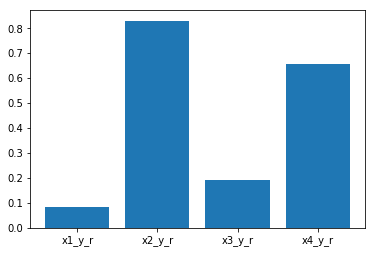

In [163]:
parameter = ['x1_y_r', 'x2_y_r', 'x3_y_r', 'x4_y_r']
r_squared = [0.085, 0.830, 0.193, 0.655]
plt.bar(parameter, r_squared)

The second bar seems to be the best fit since it has the highest r-squared value.  

**2.4)** Plot a figure with 4 subfigures, one for each polynomial degree. In each subfigure:<br>
a) Draw the original scatter plot<br>
b) Plot the curve of the true function $f(x) = 9x^2 - x + 1$ (use np.linspace to create a line)<br>
c) Plot your fitted curve for each degree. Observe how our model fits the data as the degree changes.<br>
d) Having done this exercise, why might adding polynomials to our data be useful? What conclusions can we draw from fitting the four polynomials? **(10 points)**

Text(0.5,1,'Degree 4')

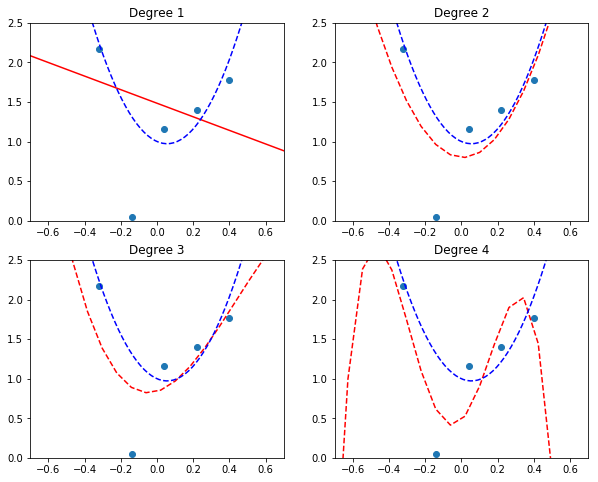

In [173]:
p1 = np.polyfit(x1,y,1)
p2 = np.polyfit(x1,y,2)
p3 = np.polyfit(x1,y,3)
p4 = np.polyfit(x1,y,4)
xp = np.linspace(-2, 6, 100)
a= np.linspace(-0.5, 0.5, 50)
b=9*(a**2)-a+1

plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.plot(x1,y,'o')
plt.ylim(0,2.5)
plt.xlim(-0.7,0.7)
plt.plot(xp,np.polyval(p1,xp),'r-')
plt.plot(a,b,'b--')
plt.title('Degree 1')

plt.subplot(2,2,2)
plt.plot(x1,y,'o')
plt.ylim(0,2.5)
plt.xlim(-0.7,0.7)
plt.plot(xp,np.polyval(p2,xp),'r--')
plt.plot(a,b,'b--')
plt.title('Degree 2')

plt.subplot(2,2,3)
plt.plot(x1,y,'o')
plt.ylim(0,2.5)
plt.xlim(-0.7,0.7)
plt.plot(xp,np.polyval(p3,xp),'r--')
plt.plot(a,b,'b--')
plt.title('Degree 3')

plt.subplot(2,2,4)
plt.plot(x1,y,'o')
plt.ylim(0,2.5)
plt.xlim(-0.7,0.7)
plt.plot(xp,np.polyval(p4,xp),'r--')
plt.plot(a,b,'b--')
plt.title('Degree 4')

By adding polynomials to our data, we can compare the result with other polynomials and find out which one is the best fit. We can conclude that the second polynomial is the best fit. 

### Problem 3 - Intro to Normalization (20 points)

This final problem is a brief exercise to explore the effects of normalization. We will be using household data from California, which was derived from the 1990 census. (https://www.kaggle.com/camnugent/california-housing-prices)

In [165]:
housing = pd.read_csv('housing.csv')
housing = housing[['median_income', 'median_house_value']][0:50]
housing.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


**3.1)** Are there any immediately obvious trends between our two variables? Sort the values by *median_house_value*, then plot the data. Write a brief description of what you see (or, more likely, what you don't see, and why that might be the case). **(10 points)**

Text(0,0.5,'Median House Value')

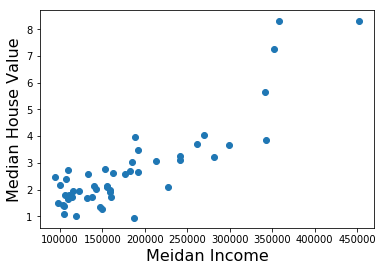

In [171]:
housing_new = housing.sort_values(by='median_house_value')
plt.scatter(housing_new['median_house_value'], housing_new['median_income'])
plt.xlabel('Meidan Income', fontsize=16)
plt.ylabel('Median House Value', fontsize=16)

In [167]:
housing_new.describe()

,median_income,median_house_value
count,50.000000,50.000000
mean,2.713902,179962.000000
std,1.627701,82950.363545
min,0.950600,93800.000000
25%,1.744850,114225.000000
50%,2.152800,155450.000000
75%,3.108750,207975.000000
max,8.325200,452600.000000


**Summary:**It seems like higher median income leads to higher median house value. But it is not very clear. I believe there are many other facts that can affact the median house value. 

**3.2)** Orthonormalize the data so that the *mean* is 0 and the *st_dev* is 1. Write this as a python function that can be fed a dataframe and return an orthonormalized version (this should take no more than 4 lines of code). Plot an orthonormalized version of the housing data that you now have. Write a brief description of how it looks different than in *3.1* and ellaborate breifly on why and in what situations orthonormalization can be useful. **(10 points)**

In [168]:
housing_new['median_house_value'] = (housing_new['median_house_value'] - housing_new['median_house_value'].mean()) / housing_new['median_house_value'].std()
housing_new['median_income'] = (housing_new['median_income'] - housing_new['median_income'].mean()) / housing_new['median_income'].std()
housing_new.describe()

,median_income,median_house_value
count,5.000000e+01,5.000000e+01
mean,-9.769963e-17,2.842171e-16
std,1.000000e+00,1.000000e+00
min,-1.083309e+00,-1.038718e+00
25%,-5.953502e-01,-7.924860e-01
50%,-3.447206e-01,-2.955020e-01
75%,2.425802e-01,3.377080e-01
max,3.447377e+00,3.286761e+00


Text(0,0.5,'Median House Value')

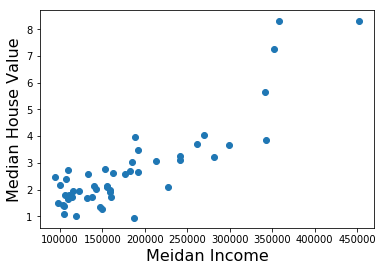

In [172]:
plt.scatter(housing_new['median_house_value'], housing_new['median_income'])
plt.xlabel('Meidan Income', fontsize=16)
plt.ylabel('Median House Value', fontsize=16)

**Summary:**It looks exactly the same as the plot in 3.1. By applying orthonormalization, we can find out the degree of influence that each variable has on the dependant variable since it can be done variable by variable. If you have a data set that has a lot of variables, and you want to find out a one standard deviation increase in one variable can affact another variable by how much, you can use orthonormalization to find out.